## Chapter 3 — Dictionaries and Sets

- dict Comprehensions
- Unpacking Mappings
- Merging Mappings with |
- Pattern Matching with Mappings
- Standard API of Mapping Types
- Hashable
- Inserting or Updating Mutable Values
- Automatic Handling of Missing Keys
- Variations of dict
- Subclassing UserDict Instead of dict
- Immutable Mappings
- Dictionary Views
- set & frozenset


> Notes
>
> - Built in types based on hash tables are highly optimized --> dict, set, frozenset


### dict Comprehensions


In [12]:
dial_codes = [
    (880, "Bangladesh"),
    (55, "Brazil"),
    (86, "China"),
    (91, "India"),
    (62, "Indonesia"),
    (81, "Japan"),
    (234, "Nigeria"),
    (92, "Pakistan"),
    (7, "Russia"),
    (1, "United States"),
]

# swap the pairs: country is the key, and code is the value
country_dial = {country: code for code, country in dial_codes}
country_dial

{'Bangladesh': 880,
 'Brazil': 55,
 'China': 86,
 'India': 91,
 'Indonesia': 62,
 'Japan': 81,
 'Nigeria': 234,
 'Pakistan': 92,
 'Russia': 7,
 'United States': 1}

In [13]:
{code: country.upper() for country, code in sorted(country_dial.items()) if code < 70}

{55: 'BRAZIL', 62: 'INDONESIA', 7: 'RUSSIA', 1: 'UNITED STATES'}

### Unpacking Mappings

- **Function Call:** we can apply `**` to more than one argument in a function call --> `keys` need to be all `strings` and `unique` across all arguments


In [2]:
def dump(**kwargs):
    return kwargs


dump(**{"x": 1}, y=2, **{"z": 3})

{'x': 1, 'y': 2, 'z': 3}

In [6]:
try:
    dump(**{"x": 1}, **{"x": 2})
except TypeError as ex:
    print(ex)

__main__.dump() got multiple values for keyword argument 'x'


- **dict literal:** duplicate keys are allowed --> Later occurrences overwrite previous ones


In [11]:
# inside
{"a": 0, **{"x": 1}, "y": 2, **{"z": 3, "x": 4}}

{'a': 0, 'x': 4, 'y': 2, 'z': 3}

### Merging Mappings with |

- Python 3.9 supports using `|` and `|= (inplace)` to merge mappings


In [15]:
d1 = {"a": 1, "b": 3}
d2 = {"a": 2, "b": 4, "c": 6}
d1 | d2

{'a': 2, 'b': 4, 'c': 6}

In [16]:
d1 |= d2
d1

{'a': 2, 'b': 4, 'c': 6}

### Pattern Matching with Mappings

- Can match instances of any actual or virtual subclass of `collections.abc.Mapping`
- Use Case: Processing records that we read from JSON APIs and databases with semi-structured schemas, like MongoDB, EdgeDB, or PostgreSQL


In [17]:
# tag::DICT_MATCH[]
def get_creators(record: dict) -> list:
    match record:
        case {
            "type": "book",
            "api": 2,
            "authors": [*names],
        }:  # <1>  a field describing the kind of record (e.g., 'type': 'movie')
            return names
        case {
            "type": "book",
            "api": 1,
            "author": name,
        }:  # <2>  a field identifying the schema version (e.g., 'api': 2')
            return [name]
        case {
            "type": "book"
        }:  # <3>  handle invalid records of a specific type (e.g., 'book')
            raise ValueError(f"Invalid 'book' record: {record!r}")
        case {"type": "movie", "director": name}:  # <4>
            return [name]
        case _:  # <5> catch-all
            raise ValueError(f"Invalid record: {record!r}")

In [18]:
b1 = dict(api=1, author="Douglas Hofstadter", type="book", title="Gödel, Escher, Bach")
get_creators(b1)

['Douglas Hofstadter']

- In contrast with sequence patterns, mapping patterns succeed on partial matches

- Note that the order of the keys in the patterns is irrelevant, even if the subject is an
  OrderedDict as b2


In [19]:
from collections import OrderedDict

b2 = OrderedDict(
    api=2,
    type="book",
    title="Python in a Nutshell",
    authors="Martelli Ravenscroft Holden".split(),
)
get_creators(b2)

['Martelli', 'Ravenscroft', 'Holden']

In [20]:
get_creators({"type": "book", "pages": 770})

ValueError: Invalid 'book' record: {'type': 'book', 'pages': 770}

In [21]:
get_creators("Spam, spam, spam")

ValueError: Invalid record: 'Spam, spam, spam'

- There is no need to use **extra to match extra key-value pairs --> no need for `**\_`
- It can be used to capture variables --> it must be the last in pattern


In [2]:
food = dict(category="ice cream", flavor="vanilla", cost=199)

match food:
    case {"category": "ice cream", **details}:
        print(f"Ice cream details: {details}")

Ice cream details: {'flavor': 'vanilla', 'cost': 199}


- The automatic handling of missing keys is not triggered because pattern matching always uses the `d.get(key, sentinel)` method


In [3]:
food = dict(category="ice cream", flavor="vanilla", cost=199)

match food:
    case {"aaa": "ice cream", **details}:
        print(f"Ice cream details: {details}")

### Standard API of Mapping Types


Using isinstance with an ABC is often better than checking whether a function argument is of the concrete dict type

- because then alternative mapping types can be used


In [26]:
from collections import abc


my_dict = {}
print(isinstance(my_dict, abc.Mapping))
print(isinstance(my_dict, abc.MutableMapping))

True
True


### Hashable

- Has a hash code which never changes during its lifetime
- it needs `__hash__` and `__eq__`
- Numeric types and flat immutable types str and bytes are all hashable
- Container types are hashable if they are immutable and all contained objects are also hashable
- A frozenset is always hashable
- User-defined types are hashable by default because their hash code is their id()


In [27]:
tt = (1, 2, (30, 40))
hash(tt)

-3907003130834322577

In [30]:
tl = (1, 2, [30, 40])
hash(tl)

TypeError: unhashable type: 'list'

In [29]:
tf = (1, 2, frozenset([30, 40]))
hash(tf)

5149391500123939311

In [9]:
for i in range(1, 250):
    print(hash(i))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [8]:
hash(1.0)

1

### Inserting or Updating Mutable Values

- Build an index mapping word -> list of occurrences


In [34]:
import re
import sys

WORD_RE = re.compile(r"\w+")
index = {}

with open("zen.txt", encoding="utf-8") as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            # this is ugly; coded like this to make a point
            occurrences = index.get(word, [])  # 1
            occurrences.append(location)  # 2
            index[word] = occurrences  # 3
# display in alphabetical order
for word in sorted(index, key=str.upper)[
    :20
]:  # str.upper is not called! used to normalized words for mapping
    print(word, index[word])

a [(19, 48), (20, 53)]
Although [(11, 1), (16, 1), (18, 1)]
ambiguity [(14, 16)]
and [(15, 23)]
are [(21, 12)]
aren [(10, 15)]
at [(16, 38)]
bad [(19, 50)]
be [(15, 14), (16, 27), (20, 50)]
beats [(11, 23)]
Beautiful [(3, 1)]
better [(3, 14), (4, 13), (5, 11), (6, 12), (7, 9), (8, 11), (17, 8), (18, 25)]
break [(10, 40)]
by [(1, 20)]
cases [(10, 9)]
complex [(5, 23)]
Complex [(6, 1)]
complicated [(6, 24)]
counts [(9, 13)]
dense [(8, 23)]


- The previous code performs at least two searches for key—three if it’s not found
- With `setdefault` we can do it in a single lookup


In [36]:
import re
import sys

WORD_RE = re.compile(r"\w+")

index = {}
with open("zen.txt", encoding="utf-8") as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            index.setdefault(word, []).append(
                location
            )  # Get the list of occurrences for word, or set it to [] if not found
# display in alphabetical order
for word in sorted(index, key=str.upper)[:20]:
    print(word, index[word])

a [(19, 48), (20, 53)]
Although [(11, 1), (16, 1), (18, 1)]
ambiguity [(14, 16)]
and [(15, 23)]
are [(21, 12)]
aren [(10, 15)]
at [(16, 38)]
bad [(19, 50)]
be [(15, 14), (16, 27), (20, 50)]
beats [(11, 23)]
Beautiful [(3, 1)]
better [(3, 14), (4, 13), (5, 11), (6, 12), (7, 9), (8, 11), (17, 8), (18, 25)]
break [(10, 40)]
by [(1, 20)]
cases [(10, 9)]
complex [(5, 23)]
Complex [(6, 1)]
complicated [(6, 24)]
counts [(9, 13)]
dense [(8, 23)]


### Automatic Handling of Missing Keys


#### defaultdict: Another Take on Missing Keys


In [8]:
import collections
import re
import sys

WORD_RE = re.compile(r"\w+")
index = collections.defaultdict(list)  # 1
with open("zen.txt", encoding="utf-8") as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            index[word].append(location)  # 2
# display in alphabetical order
for word in sorted(index, key=str.upper)[:5]:
    print(word, index[word])

a [(19, 48), (20, 53)]
Although [(11, 1), (16, 1), (18, 1)]
ambiguity [(14, 16)]
and [(15, 23)]
are [(21, 12)]


> 1. Create a defaultdict with the list constructor as `default_factory`
> 2. If word is not initially in the index, the default_factory is called to produce the missing value, which in this case is an empty list that is then assigned to `index[word]` and returned, so the `.append(location)` operation always succeeds


#### The `__missing__` Method

- This method is not defined in the base dict class, but dict is aware of it (using `__getitem__`)
- A better way to create a user-defined mapping type is to subclass `collections.UserDict` instead of dict

The following example, converts `nonstring keys to str` on lookup


In [38]:
class StrKeyDict0(dict):  # <1>
    def __missing__(self, key):
        if isinstance(key, str):  # <2>
            raise KeyError(key)
        return self[str(key)]  # <3>

    def get(self, key, default=None):
        try:
            return self[key]  # <4>
        except KeyError:
            return default  # <5>

    def __contains__(self, key):
        return key in self.keys() or str(key) in self.keys()  # <6>

In [40]:
# Tests for item retrieval using `d[key]` notation::
d = StrKeyDict0([("2", "two"), ("4", "four")])
d["2"]

'two'

In [41]:
d[4]

'four'

In [42]:
d[1]

KeyError: '1'

In [43]:
# Tests for item retrieval using `d.get(key)` notation::
d.get("2")

'two'

In [44]:
d.get(4)

'four'

In [45]:
d.get(1, "N/A")

'N/A'

In [46]:
# Tests for the `in` operator::
2 in d

True

In [47]:
1 in d

False

- Different behvavior of **missing**:
  - When inherited from _dict_: only called on `d[k]`
  - When inherited from _collections.UserDict_: called on `d[k]` and `d.get(k)`
  - When inherited from _abc.mapping_: by default no calling
  - When inherited from _abc.mapping_ and `__getitem__` is using `__missing__`: called on `d[k]` and `d.get(k)`


### Variations of dict

`collections.OrderedDict`


#### Orderdict vs dict

- The equality operation for OrderedDict checks for matching order.


In [ ]:
from collections import OrderedDict

first = OrderedDict({"a": 1, "b": 2})
second = OrderedDict({"b": 2, "a": 1})
print(first == second)
first = dict({"a": 1, "b": 2})
second = dict({"b": 2, "a": 1})
print(first == second)

False
True


- OrderedDict has a move_to_end() method to efficiently reposition an element to an endpoint.


In [ ]:
my_dict = {"kiwi": 4, "apple": 5, "cat": 3, "dog": 3}
ordered_dict = OrderedDict()
ordered_dict = OrderedDict(my_dict)
ordered_dict.move_to_end("apple")
ordered_dict.move_to_end("dog", False)
print(ordered_dict)

OrderedDict([('dog', 3), ('kiwi', 4), ('cat', 3), ('apple', 5)])


- The popitem() method of OrderedDict has a different signature. It accepts an
  optional argument to specify which item is popped.


In [ ]:
item = ordered_dict.popitem(True)  # False pop first item
print(item)
print(ordered_dict)

`collections.ChainMap`


In [ ]:
d1 = dict(a=1, b=3)
d2 = dict(a=2, b=4, c=6)

from collections import ChainMap

chain = ChainMap(d1, d2)

chain["a"], chain["c"]

(1, 6)

Updates or insertions to a ChainMap only affect the first input mapping


In [ ]:
chain["c"] = -1
d1, d2

({'a': 1, 'b': 3, 'c': -1}, {'a': 2, 'b': 4, 'c': 6})

ChainMap is useful to implement interpreters for languages with nested scopes --> covered in `Chapter 18`


In [ ]:
import builtins

pylookup = ChainMap(locals(), globals(), vars(builtins))

`collections.Counter`


In [ ]:
ct = collections.Counter("abracadabra")
ct

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [ ]:
ct.update("aaaaazzz")
ct

Counter({'a': 10, 'z': 3, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [ ]:
ct.most_common(3)

[('a', 10), ('z', 3), ('b', 2)]

> Note that the 'b' and 'r' keys are tied in third place, but ct.most_common(3) shows only three counts


In [ ]:
import re

words = re.findall(
    r"\w+", open("zen.txt").read().lower()
)  # can even pass a text file to counter
collections.Counter(words).most_common(10)

`shelve.Shelf`


- The shelve module in the standard library provides persistent storage for a mapping of string keys to Python objects serialized in the pickle binary format

- The `shelve.open` module-level function returns a shelve.Shelf instance -- a simple key-value DBM database backed by the `dbm` module

- Python’s pickle is easy to use in the simplest cases, but has several drawbacks


`collections.ChainMap`


In [19]:
d1 = dict(a=1, b=3)
d2 = dict(a=2, b=4, c=6)

from collections import ChainMap

chain = ChainMap(d1, d2)

chain["a"], chain["c"]

(1, 6)

Updates or insertions to a ChainMap only affect the first input mapping


In [18]:
chain["c"] = -1
d1, d2

({'a': 1, 'b': 3, 'c': -1}, {'a': 2, 'b': 4, 'c': 6})

ChainMap is useful to implement interpreters for languages with nested scopes --> covered in `Chapter 18`


In [20]:
import builtins

pylookup = ChainMap(locals(), globals(), vars(builtins))

`collections.Counter`


In [21]:
ct = collections.Counter("abracadabra")
ct

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [22]:
ct.update("aaaaazzz")
ct

Counter({'a': 10, 'z': 3, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [23]:
ct.most_common(3)

[('a', 10), ('z', 3), ('b', 2)]

> Note that the 'b' and 'r' keys are tied in third place, but ct.most_common(3) shows only three counts


`shelve.Shelf`


- The shelve module in the standard library provides persistent storage for a mapping of string keys to Python objects serialized in the pickle binary format

- The `shelve.open` module-level function returns a shelve.Shelf instance -- a simple key-value DBM database backed by the `dbm` module

- Python’s pickle is easy to use in the simplest cases, but has several drawbacks


### Subclassing UserDict Instead of dict

Main Reason:

- built-in has some implementation shortcuts that end up forcing us to override methods that we can just inherit from UserDict with no problems
- Note that UserDict does not inherit from dict, but uses composition: it has an internal dict instance, called data, which holds the actual items


In [ ]:
import collections


class StrKeyDict(collections.UserDict):  # <1>
    def __missing__(self, key):  # <2>
        if isinstance(key, str):
            raise KeyError(key)
        return self[str(key)]

    def __contains__(self, key):
        return str(key) in self.data  # <3>

    def __setitem__(self, key, item):
        self.data[str(key)] = item  # <4>

1.  StrKeyDict extends UserDict.
2.  `__missing__` is exactly as in Example 3-8.
3.  `__contains__` is simpler: we can assume all stored keys are str, and we can check on self.data instead of invoking self.keys() as we did in StrKeyDict0.
4.  `__setitem__` converts any key to a str. This method is easier to overwrite when we can delegate to the self.data attribute.


### Immutable Mappings

- Use Case: to prevent users from changing a mapping by accident
- The `types` module provides a wrapper class called `MappingProxyType`, which, given a mapping,  
  returns a mappingproxy instance that is a read-only but dynamic proxy for the original mapping


In [9]:
from types import MappingProxyType

d = {1: "A"}

# Items in d can be seen through d_proxy
d_proxy = MappingProxyType(d)
d_proxy

mappingproxy({1: 'A'})

In [10]:
# Changes cannot be made through d_proxy
d_proxy[2] = "x"
d_proxy

TypeError: 'mappingproxy' object does not support item assignment

In [12]:
# d_proxy is dynamic: any change in d is reflected
d[2] = "B"
d_proxy

mappingproxy({1: 'A', 2: 'B'})

In [13]:
d_proxy[2]

'B'

### Dictionary Views

- These dictionary views are read-only projections of the internal data structures used in the dict implementation.
- They avoid the memory overhead of the equivalent Python 2 methods that returned lists
- View output can act like set or list, depending on values of dictionary (mutable/immutable)


In [60]:
d = dict(a=10, b=20, c=30)
values = d.values()
values

dict_values([10, 20, 30])

In [61]:
len(values)

3

Views are iterable, so it’s easy to create lists from them


In [62]:
list(values)

[10, 20, 30]

Views implement `__reversed__`, returning a custom iterator


In [63]:
reversed(values)

We can’t use [] to get individual items from a view


In [64]:
values[0]

TypeError: 'dict_values' object is not subscriptable

A view object is a dynamic proxy.

- If the source dict is updated, you can immediately see the changes through an existing view


In [65]:
d["z"] = 99
d

{'a': 10, 'b': 20, 'c': 30, 'z': 99}

In [67]:
d.values()

dict_values([10, 20, 30, 99])

### Dictionary and user-defined classes

- Attributes are stored in a dictionary
- For optimization purposes define all the attributes in `__init__`
- Also defining `__slot__` would save memory specially if there are many instances of that class


## set & frozenset


- A set is a collection of unique objects.
- A basic use case is removing duplication


In [24]:
l = ["spam", "spam", "eggs", "spam", "bacon", "eggs"]
list(set(l))

['bacon', 'spam', 'eggs']

How to remove duplicates but also preserve the order of the first occurrence?


In [29]:
dict.fromkeys(l)

{'spam': None, 'eggs': None, 'bacon': None}

In [27]:
dict.fromkeys(l).keys()
list(dict.fromkeys(l).keys())

['spam', 'eggs', 'bacon']

#### Set Comprehensions


In [31]:
from unicodedata import name

a = {chr(i) for i in range(32, 256) if "SIGN" in name(chr(i), "")}
print(a)

{'£', '>', '#', '¥', '¤', '¶', '+', '×', '$', '%', '§', 'µ', '®', '<', '©', '¢', '°', '=', '±', '÷', '¬'}


#### Set Operations on dict Views


dict_keys and dict_items `implement` the special methods to support the powerful set operators:

- `&` (intersection), `|` (union), `-` (difference), and `^` (symmetric difference).


In [2]:
d1 = dict(a=1, b=2, c=3, d=4)
d2 = dict(b=20, d=40, e=50)
d1.keys() & d2.keys()

{'b', 'd'}

views are compatible with set instances


In [4]:
s = {"a", "e", "i"}
d1.keys() & s

{'a'}

In [5]:
d1.keys() | s

{'a', 'b', 'c', 'd', 'e', 'i'}

> A dict_items view only works as a set if all values in the dict are hashable.


- An example: write a function that take a list of numbers and a target value and determine if there is two numbers such their summuations is the target value, if so return them.


### Performance experiment


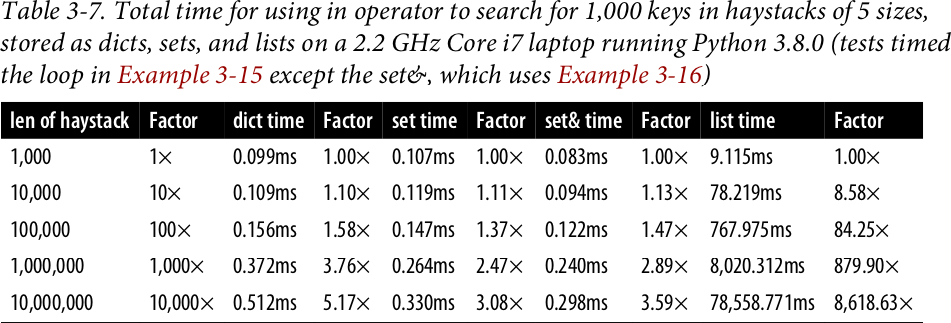


### Hashes

- Two equal object have the same hash
- Hash codes should scatter around the index space as much as possible.objects that are similar but not equal should have hash codes that differ widely
- Compresseion funciton: Direct hash code is not suitable, compression function generate indexes according to the table size
  - Division: simple take the reminder
  - MAD: Multiply, add divide: more scattered
  - ...
- Hash collisions: different object could end of having the same hash
  - Linear/Quadratic probing: Place the element on the next indexes
    - Should place empty flag on deleted objects
- Load factor: number of elements divided by table size
  - Above 2/3 is usually bad for hash collision, double the table size (around 1/3 to 2/3 is considered to be good)
- [**key sharing**](https://peps.python.org/pep-0412/) and [**compact dict**](https://docs.python.org/3/whatsnew/3.6.html#new-dict-implementation) in python dicitonary implementation


In [4]:
print(hash(1.0))
print(hash(1.0001))
print(hash(1.0002))

1
230584300921345
461168601842689


### Lecturers

1. Mohammad Javad Zohrabi, date: 10-10-2023, [GitHub](https://github.com/icocoder)
2. Mohammadreza Nakhaei, date: 10-10-2023, [LinkedIn](https://www.linkedin.com/in/mohammadreza-nakhaei-816284113/)

### Reviewers

1. Reza Hashemian date: 10-10-2023, [LinkedIn](https://www.linkedin.com/in/rezahashemian)
2. Atefeh Hosseini date: 10-10-2023, [LinkedIn](https://www.linkedin.com/in/atefeh-hosseini-61160b275)
